In [1]:
# 
grid_size = 5
actions = ["up","down","right","left"] # çarpraz ilerleme?

In [2]:
reward_goal = 1
reward_obstacle = -1
reward_step = -0.01 # 8 adım 9 adım 10 adım

In [4]:
start_state = (0,0)
goal_state = (4,4)

In [6]:
import numpy as np
q_table = np.zeros((grid_size, grid_size, len(actions)))

In [11]:
learning_rate = 0.1 # q-table güncellenirken yeni öğrendiğin bilgiye ne kadar güven?
discount_factor = 0.95 # agent state'i ilerledikçe ödüllere uygulanacak durum => 1 * 0.95 => 0.95
epsilon = 1.0 #Başlangıç keşfi -> Keşfetme oranı %100 başlangıçta tamamen random
epsilon_decay = 0.995 # epsilon = epsilon * 0.995 -> 1.0 -> 0.995 -> 0.99 -> 0.98
epsilon_min = 0.1 # min keşif oranı.
episode_count = 500

In [13]:
min(4,5), max(0,-5)

(4, 0)

In [27]:
# take_action( (1,1), 'right' )
def take_action(state, action):
    x, y = state
    if action == 'up':
        x = max(0, x-1) # max(0,-5) 0 max(0,1) 1
    elif action == 'down':
        x = min(grid_size - 1, x+1) # min(4,5) -> 4
    elif action == 'right':
        y = min(grid_size-1, y+1)
    elif action == 'left':
        y = max(0, y - 1)
        
    return (x,y)

In [20]:
rewards_per_episode = []

In [28]:
import random

# 0.98
for episode in range(episode_count):
    state = start_state
    total_reward = 0
    for i in range(100):
        if random.uniform(0,1) < epsilon: # 0.80 - 1 0.91<0.90
            action_index = random.randint(0,len(actions) - 1)
        else:
            action_index = np.argmax(q_table[ state[0], state[1] ] )
    
        action = actions[action_index]
        new_state = take_action(state,action)
    
        if new_state == goal_state:
            reward = reward_goal
        elif new_state == state:
            reward = reward_obstacle
        else:
            reward = reward_step
    
        old_q_value = q_table[state[0], state[1], action_index] # ilk state (hareket ettiğim)
        next_max = np.max(q_table[new_state[0], new_state[1]]) # hareketten sonra aldığım max puan
    
        new_q_value = old_q_value + learning_rate * (reward + discount_factor * next_max - old_q_value)
        q_table[state[0],state[1]] = new_q_value
    
        state = new_state
        total_reward += reward

        if state == goal_state:
            break
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    rewards_per_episode.append(total_reward)    
    # diyelim ki ajan (2,3) => Right -> 0.2
    # ilerleyen ödüller 0.7 oranında
    # 0.5 fark var Eski Q:0.2 Yeni Q: %10 0.5*0.1 => 0.05'lik bir düzeltme. 0.2 -> 0.25e çıktı Q değeri

In [30]:
import matplotlib.pyplot as plt

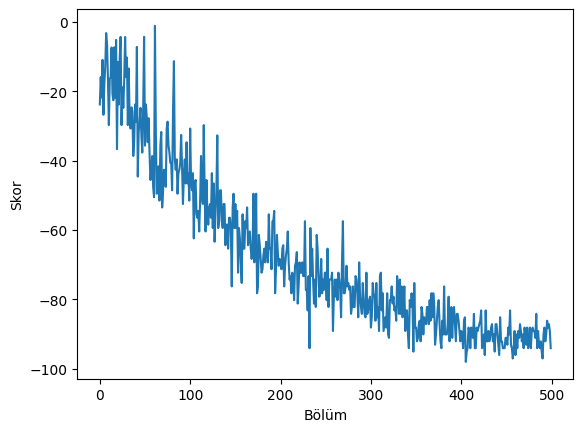

In [32]:
plt.plot(rewards_per_episode)
plt.xlabel("Bölüm")
plt.ylabel("Skor")
plt.show()

In [34]:
state = start_state
steps = 0
print("Ajan başlıyor..")

Ajan başlıyor..


In [39]:
import os
def render(start_state):
    os.system('cls' if os.name == 'nt' else 'clear')
    for i in range(grid_size):
        row = ''
        for j in range(grid_size):
            if (i,j) == start_state:
                row += ' A '
            elif (i,j) == goal_state:
                row += ' H '
            else:
                row += ' . '
            print(row)
        print("\n")

In [41]:
import time

while state != goal_state and steps < 50:
    render(state)
    action_index = np.argmax(q_table[state[0],state[1]])
    action = actions[action_index]
    state = take_action(state,action)
    steps += 1
    time.sleep(0.5)